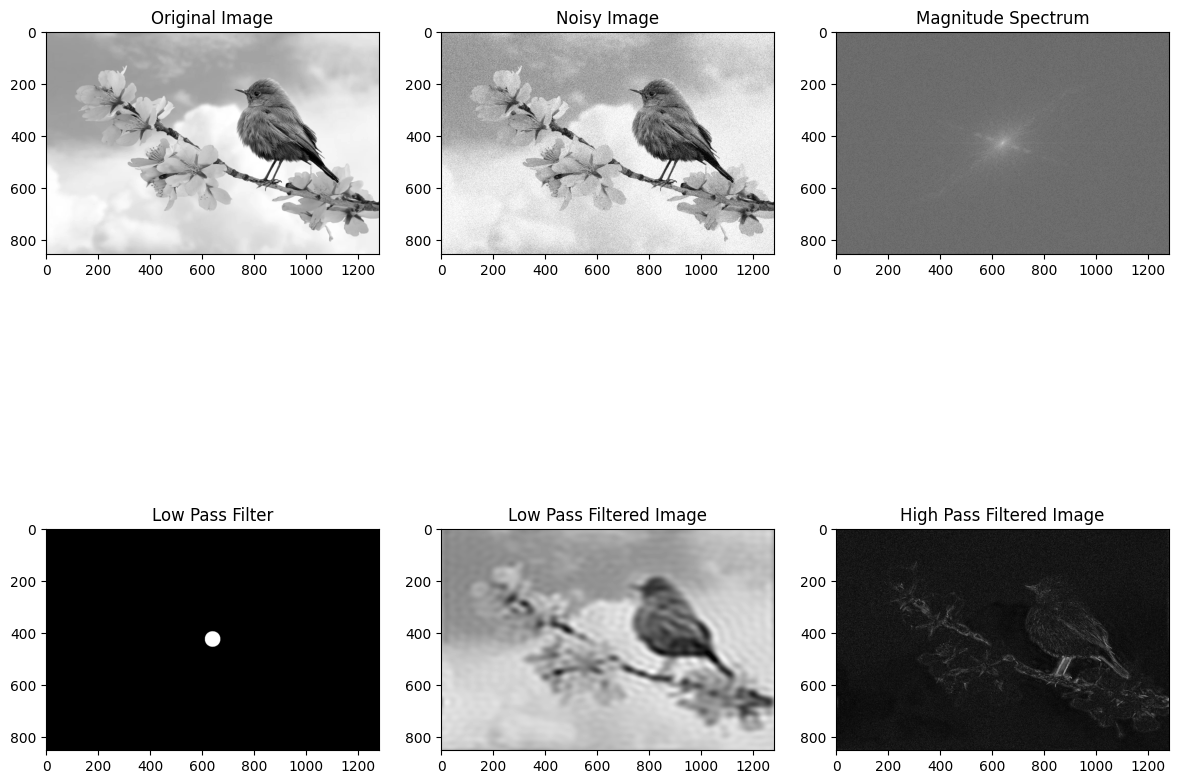

In [3]:
# prompt: Python program to implement image enhancement using frequency domain filter to perform HPF and LPF over the given noisy images

import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

def add_gausian_noise(image,mean=0,sigma=25):
  gauss = np.random.normal(mean,sigma,image.shape)
  noisy_image = image + gauss
  noisy_image = np.clip(noisy_image,0,255)
  return noisy_image.astype(np.uint8)

def create_low_pass_filter(rows,cols,radius):
  mask = np.zeros((rows,cols),np.float32)
  center = (rows//2,cols//2)
  for i in range(rows):
    for j in range(cols):
      if (i-center[0])**2 + (j-center[1])**2 <= radius**2:
        mask[i,j] = 1
  return mask

def create_high_pass_filter(rows,cols,radius):
  mask = np.ones((rows, cols), np.float32)
  center=(rows//2,cols//2)
  for i in range(rows):
    for j in range(cols):
      if np.sqrt((i-center[0])**2 + (j-center[1])**2) <= radius:
        mask[i,j] = 0
  return mask

def perform_dft(image):
  dft=cv.dft(np.float32(image),flags=cv.DFT_COMPLEX_OUTPUT)
  dft_shift=np.fft.fftshift(dft)
  magnitude_spectrum = 20*np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]+1))
  return dft_shift, magnitude_spectrum

def apply_filter(dft_shift,filter_mask):
  filtered_dft_shift = dft_shift*filter_mask[:, :, np.newaxis]
  dft_ishift = np.fft.ifftshift(filtered_dft_shift)
  img_back = cv.idft(dft_ishift)
  img_back = cv.magnitude(img_back[:,:,0],img_back[:,:,1])
  return img_back

img =cv.imread("./img.jpg",0)

noisy_image = add_gausian_noise(img)
rows,cols=img.shape

dft_shift,magnitude_spectrum = perform_dft(noisy_image)

low_pass_filter = create_low_pass_filter(rows,cols,30)
high_pass_filter = create_high_pass_filter(rows,cols,30)

low_pass_filtered_image = apply_filter(dft_shift,low_pass_filter)
high_pass_filtered_image = apply_filter(dft_shift,high_pass_filter)

plt.figure(figsize=(12,12))

plt.subplot(2,3,1)
plt.imshow(img,cmap="gray")
plt.title("Original Image")

plt.subplot(2,3,2)
plt.imshow(noisy_image,cmap="gray")
plt.title("Noisy Image")

plt.subplot(2,3,3)
plt.imshow(magnitude_spectrum,cmap="gray")
plt.title("Magnitude Spectrum")

plt.subplot(2,3,4)
plt.imshow(low_pass_filter,cmap="gray")
plt.title("Low Pass Filter")

plt.subplot(2,3,5)
plt.imshow(low_pass_filtered_image,cmap="gray")
plt.title("Low Pass Filtered Image")

plt.subplot(2,3,6)
plt.imshow(high_pass_filtered_image,cmap="gray")
plt.title("High Pass Filtered Image")

plt.tight_layout()

plt.show()
